<a href="https://colab.research.google.com/github/sraeisi/QuantumOptics/blob/master/Rabi_Oscillation%26RWA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm


'''Set the defaults for your plots.'''

SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('axes', linewidth = 5 )
plt.rc('lines', linewidth = 5 )

plt.rc('lines', markersize = 5 )

plt.rc('figure', figsize=(8,4) )         # Image size





In [2]:
sig_x = np.array([[0,1],[1,0]])
sig_y = np.array([[0,-1.j],[1.j,0]])
sig_z = np.array([[1,0],[0,-1]])

def R_z(theta):
  return expm( 1.j*theta*sig_z/2 )

R_z(np.pi)  

array([[0.+1.j, 0.+0.j],
       [0.+0.j, 0.-1.j]])

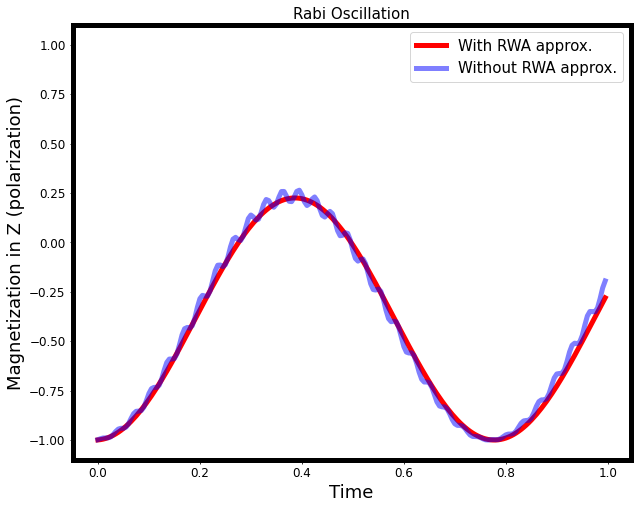

In [57]:
Delta = 100  #Hz
Drive_omg = 95  #Hz
Rabi_omg = 1*2*np.pi  #Rad/sec

dt=.005
n_osc=1
t_f = n_osc *2*np.pi/Rabi_omg
time_list = np.arange(0,t_f, dt)

in_state = np.array([0,1])

def rf_hamiltonian(t, delta = Delta, g = Rabi_omg, omg = Drive_omg):
  # return  g/2* (  np.dot(np.dot( R_z( (delta-omg)*t ), sig_x), R_z( -(delta-omg)*t ))  +  np.dot(np.dot( R_z( (delta+omg)*t ), sig_x), R_z( -(delta+omg)*t )))
  return  g/2* (  R_z( (delta-omg)*t )@ sig_x @ R_z( -(delta-omg)*t ) +   R_z( (delta+omg)*t ) @ sig_x @ R_z( -(delta+omg)*t ) )

def rfa_hamiltonian(t, delta = Delta, g = Rabi_omg, omg = Drive_omg):
  return   g/2* (  R_z( (delta-omg)*t )@ sig_x @ R_z( -(delta-omg)*t ) )

def evolve(state, h):
  u = np.array([[1,0],[0,1]])
  state_list = [state]
  for t in time_list:
    U = expm(1.j*dt*h(t) )
    state = np.dot(U, state)
    state_list += [state]

  return state_list

def polarization(state):
  return np.abs(state[0])**2 - np.abs(state[1])**2


rf_s_list = evolve(in_state, rf_hamiltonian)
rf_pol_list = [polarization(s) for s in rf_s_list]

rfa_s_list = evolve(in_state, rfa_hamiltonian)
rfa_pol_list = [polarization(s) for s in rfa_s_list]


fig = plt.figure(  figsize=(10,8)  )
ax = fig.add_subplot(xlabel = 'Time', ylabel = 'Magnetization in Z (polarization)', title = 'Rabi Oscillation' )

ax.plot(time_list[::], rfa_pol_list[1::], label='With RWA approx.', c = 'r')
ax.plot(time_list[::], rf_pol_list[1::], label='Without RWA approx.', c = 'b', alpha = .5)
plt.legend(loc=1)
plt.ylim(-1.1,1.1)
plt.show()

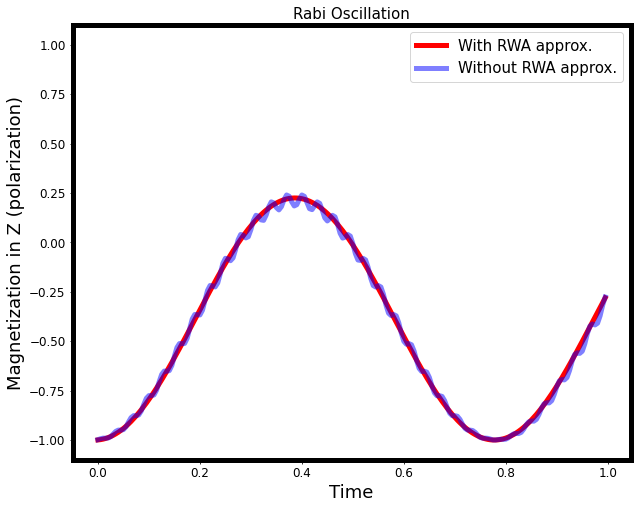

In [58]:
Delta = 100  #Hz
Drive_omg = 105  #Hz
Rabi_omg = 1*2*np.pi  #Rad/sec

dt=.005
n_osc=1
t_f = n_osc *2*np.pi/Rabi_omg
time_list = np.arange(0,t_f, dt)

in_state = np.array([0,1])

def rf_hamiltonian(t, delta = Delta, g = Rabi_omg, omg = Drive_omg):
  # return  g/2* (  np.dot(np.dot( R_z( (delta-omg)*t ), sig_x), R_z( -(delta-omg)*t ))  +  np.dot(np.dot( R_z( (delta+omg)*t ), sig_x), R_z( -(delta+omg)*t )))
  return  g/2* (  R_z( (delta-omg)*t )@ sig_x @ R_z( -(delta-omg)*t ) +   R_z( (delta+omg)*t ) @ sig_x @ R_z( -(delta+omg)*t ) )

def rfa_hamiltonian(t, delta = Delta, g = Rabi_omg, omg = Drive_omg):
  return   g/2* (  R_z( (delta-omg)*t )@ sig_x @ R_z( -(delta-omg)*t ) )

def evolve(state, h):
  u = np.array([[1,0],[0,1]])
  state_list = [state]
  for t in time_list:
    U = expm(1.j*dt*h(t) )
    state = np.dot(U, state)
    state_list += [state]

  return state_list

def polarization(state):
  return np.abs(state[0])**2 - np.abs(state[1])**2


rf_s_list = evolve(in_state, rf_hamiltonian)
rf_pol_list = [polarization(s) for s in rf_s_list]

rfa_s_list = evolve(in_state, rfa_hamiltonian)
rfa_pol_list = [polarization(s) for s in rfa_s_list]


fig = plt.figure(  figsize=(10,8)  )
ax = fig.add_subplot(xlabel = 'Time', ylabel = 'Magnetization in Z (polarization)', title = 'Rabi Oscillation' )

ax.plot(time_list[::], rfa_pol_list[1::], label='With RWA approx.', c = 'r')
ax.plot(time_list[::], rf_pol_list[1::], label='Without RWA approx.', c = 'b', alpha = .5)
plt.legend(loc=1)
plt.ylim(-1.1,1.1)
plt.show()